## **This is the second test file**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Desktop/PROJECT/data/raw/1738613946331O-result.csv')

In [3]:
df.head(5)

,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag
0,418551920284673408,10.127242,56.537189,14.090976,49.125646,-31.595374,1.942524
1,4357027756659697664,243.586211,-3.694968,20.411292,-45.340019,-144.432722,2.016425
2,5589311357728452608,109.285594,-37.097444,5.762063,-11.562000,6.520111,2.083237
3,4993479684438433792,6.572156,-42.307820,39.918258,176.268293,-398.872135,2.089977
4,4038055447778237312,274.406090,-36.762429,23.885852,-131.804070,-166.308930,2.116495


In [8]:
df.columns

Index(['source_id', 'ra', 'dec', 'parallax', 'pmra', 'pmdec',
       'phot_g_mean_mag', 'pm_total', 'distance'],
      dtype='object')

## **Step 1: Feature Engineering**
We'll create:

- **pm_total**: The total proper motion combining pmra and pmdec.
- **distance**: The inverse of parallax (for positive values only).


In [5]:

# Compute total proper motion
df["pm_total"] = np.sqrt(df["pmra"]**2 + df["pmdec"]**2)

# Compute distance (handle non-positive parallax)
df["distance"] = np.where(df["parallax"] > 0, 1 / df["parallax"], np.nan)

# Drop rows with NaN distances (optional, depending on dataset size)
df = df.dropna(subset=["distance"])

# Preview updated dataset
print(df.head())


             source_id          ra        dec   parallax        pmra  \
0   418551920284673408   10.127242  56.537189  14.090976   49.125646   
1  4357027756659697664  243.586211  -3.694968  20.411292  -45.340019   
2  5589311357728452608  109.285594 -37.097444   5.762063  -11.562000   
3  4993479684438433792    6.572156 -42.307820  39.918258  176.268293   
4  4038055447778237312  274.406090 -36.762429  23.885852 -131.804070   

        pmdec  phot_g_mean_mag    pm_total  distance  
0  -31.595374         1.942524   58.408876  0.070967  
1 -144.432722         2.016425  151.382062  0.048992  
2    6.520111         2.083237   13.273722  0.173549  
3 -398.872135         2.089977  436.084270  0.025051  
4 -166.308930         2.116495  212.205027  0.041866  



### **Step 2: Scaling & Normalization**
Now that we’ve added **pm_total** and **distance**, we need to scale our features so that they are on similar ranges. This helps models like Random Forest and especially Gradient Boosting perform better.

In [9]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns to scale
features_to_scale = ["ra", "dec", "parallax", "pmra", "pmdec", "phot_g_mean_mag", "pm_total", "distance"]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df_scaled = df.copy()  # Create a copy to avoid modifying original data
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Check the transformed dataset
print(df_scaled.head())


             source_id        ra       dec  parallax      pmra     pmdec  \
0   418551920284673408 -1.749785  1.505563 -0.232368  0.241929 -0.003190   
1  4357027756659697664  0.584102  0.022155 -0.001363 -0.218768 -0.744528   
2  5589311357728452608 -0.758500 -0.800488 -0.536786 -0.054037  0.247227   
3  4993479684438433792 -1.785325 -0.928810  0.711608  0.861988 -2.416188   
4  4038055447778237312  0.892207 -0.792237  0.125631 -0.640443 -0.888254   

   phot_g_mean_mag  pm_total  distance  
0        -3.194105 -0.311147 -0.378870  
1        -3.031053  0.105347 -0.547523  
2        -2.883642 -0.513339  0.408424  
3        -2.868771  1.380734 -0.731268  
4        -2.810264  0.377817 -0.602219  


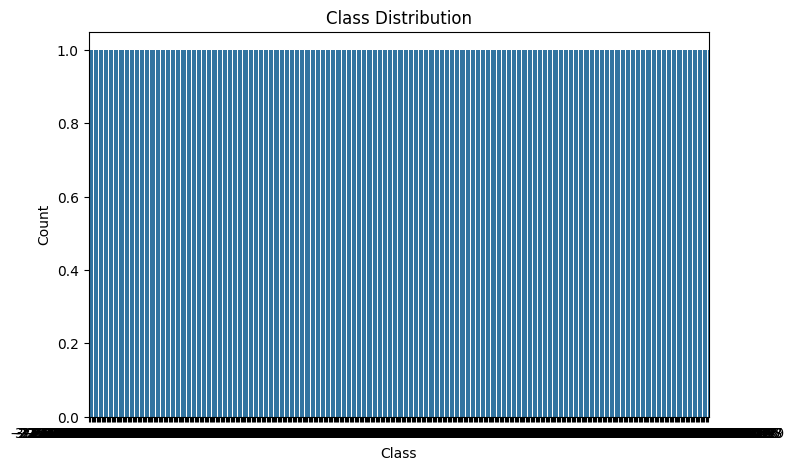

phot_g_mean_mag
 1.231627    1
-3.194105    1
-3.031053    1
-2.883642    1
 1.178101    1
            ..
-2.472969    1
-2.573751    1
-2.631446    1
-2.662754    1
-2.810264    1
Name: count, Length: 500, dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each class in the target column
target_col = "phot_g_mean_mag"  # Replace with the actual target column name
class_counts = df_scaled[target_col].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

# Print raw counts
print(class_counts)
